### 조이스틱이 없는 상황을 가정하여 위젯버튼으로 로봇을 제어해보자!

In [1]:
from jetbot import Robot

In [2]:
robot = Robot() # robot 인스턴스화

In [8]:
robot.down(1)

In [6]:
robot.up(1)

In [9]:
robot.vertical_motors_stop()

In [18]:
robot.forward(0.5)

In [19]:
robot.stop()

In [20]:
import time
robot.forward(0.5)
time.sleep(1)
robot.stop()

#### 1. 슬라이더바로 조종해보기

In [26]:
import ipywidgets.widgets as widgets
from IPython.display import display

# 두 개의 슬라이더바를 만들어보자!
left_slider = widgets.FloatSlider(description = 'left', min = -1.0, max = 1.0, step = 0.01, orientation = 'vertical')
right_slider = widgets.FloatSlider(description = 'right',min = -1.0, max = 1.0, step = 0.01, orientation = 'vertical')

# 수평으로 두 개의 슬라이더 위치 -> HBox : 수평, VBox :수직
slider_container = widgets.HBox([left_slider, right_slider])

# 보여주기
display(slider_container)

In [29]:
# 슬라이더바와 로봇 링크
import traitlets
left_link = traitlets.link((left_slider, 'value'),(robot.left_motor, 'value'))
right_link = traitlets.link((right_slider, 'value'),(robot.right_motor, 'value'))

In [28]:
# 연결 끊기
left_link.unlink()
right_link.unlink()

#### 2. 버튼으로 조종해보기

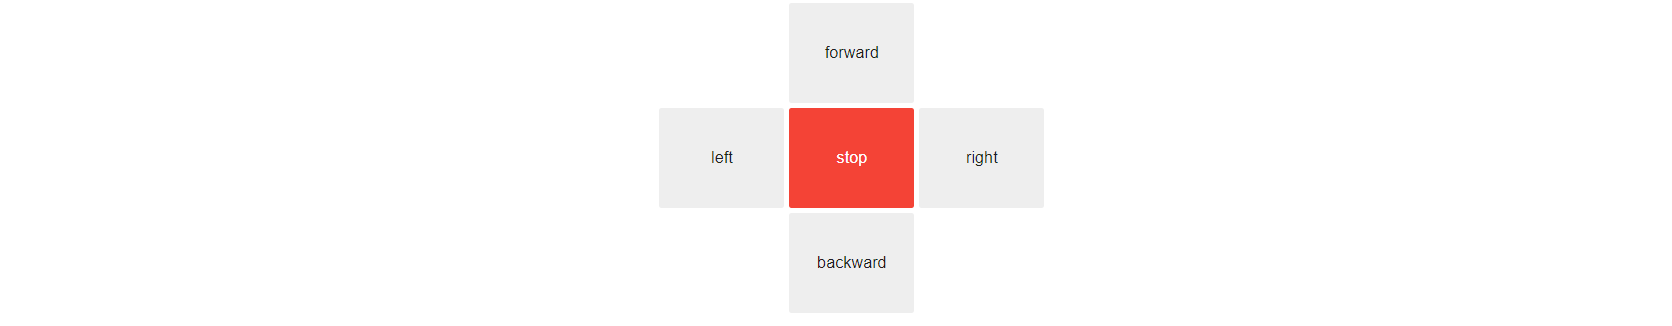

In [49]:
# 1. widget의 layout width = 100px, height = 80px, align_self = 'center'
button_layout = widgets.Layout(width='100px', height='80px', align_self='center')
# 2. stop_button -> red button
stop_button = widgets.Button(description='stop', button_style='danger', layout=button_layout)

# 3. left_button, right_button, backward_button, forward_button 버튼
left_button = widgets.Button(description='left', layout=button_layout)
right_button = widgets.Button(description='right', layout=button_layout)
backward_button = widgets.Button(description='backward', layout=button_layout)
forward_button = widgets.Button(description='forward', layout=button_layout)

# 4. display로 보여주기
middle_box = widgets.HBox([left_button, stop_button, right_button], layout = widgets.Layout(align_self='center'))
control_box = widgets.VBox([forward_button, middle_box, backward_button])

display(control_box)

In [50]:
# 콜백함수 : 직접 호출하는 것이 아니라, 다른 함수에 의해서 호출되는 함수!
def stop(change) :
    robot.stop()
    
def step_forward(change):
    robot.forward(0.5)
    time.sleep(0.5)
    robot.stop()
    
def step_backward(change) :
    robot.backward(0.5)
    time.sleep(0.5)
    robot.stop()
    
def step_right(change) :
    robot.right()
    time.sleep(0.5)
    robot.stop()
    
def step_left(change) :
    robot.left()
    time.sleep(0.5)
    robot.stop()

In [52]:
# 버튼과 함수를 연결시키기!
stop_button.on_click(stop)
forward_button.on_click(step_forward)
backward_button.on_click(step_backward)
right_button.on_click(step_right)
left_button.on_click(step_left)